In [1]:
# if you keras is not using tensorflow as backend set "KERAS_BACKEND=tensorflow" use this command
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal

C:\Users\Santosh\Anaconda3\lib\site-packages\h5py\__init__.py:72: UserWarning: h5py is running against HDF5 1.10.2 when it was built against 1.10.3, this may cause problems
  '{0}.{1}.{2}'.format(*version.hdf5_built_version_tuple)
Using TensorFlow backend.


In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [3]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [5]:
# if you observe the input shape its 2 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [6]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [7]:
# An example data point
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [8]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255
X_test = X_test/255

In [9]:
# example data point after normlizing
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [10]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) #one hot incoding
Y_test = np_utils.to_categorical(y_test, 10)#one hot incoding

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## Softmax classifier 

In [11]:
# https://keras.io/getting-started/sequential-model-guide/

# The Sequential model is a linear stack of layers.
# you can create a Sequential model by passing a list of layer instances to the constructor:

# model = Sequential([
#     Dense(32, input_shape=(784,)),
#     Activation('relu'),
#     Dense(10),
#     Activation('softmax'),
# ])

# You can also simply add layers via the .add() method:

# model = Sequential()
# model.add(Dense(32, input_dim=784))
# model.add(Activation('relu'))

###

# https://keras.io/layers/core/

# keras.layers.Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', 
# bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, 
# kernel_constraint=None, bias_constraint=None)

# Dense implements the operation: output = activation(dot(input, kernel) + bias) where
# activation is the element-wise activation function passed as the activation argument, 
# kernel is a weights matrix created by the layer, and 
# bias is a bias vector created by the layer (only applicable if use_bias is True).

# output = activation(dot(input, kernel) + bias)  => y = activation(WT. X + b)

####

# https://keras.io/activations/

# Activations can either be used through an Activation layer, or through the activation argument supported by all forward layers:

# from keras.layers import Activation, Dense

# model.add(Dense(64))
# model.add(Activation('tanh'))

# This is equivalent to:
# model.add(Dense(64, activation='tanh'))

# there are many activation functions ar available ex: tanh, relu, softmax


from keras.models import Sequential 
from keras.layers import Dense, Activation 


In [12]:
# some model parameters

output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128 
nb_epoch = 20

In [13]:
# start building a model
model = Sequential()#output of one model goe to input to second model

# The model needs to know what input shape it should expect. 
# For this reason, the first layer in a Sequential model 
# (and only the first, because following layers can do automatic shape inference)
# needs to receive information about its input shape. 
# you can use input_shape and input_dim to pass the shape of input

# output_dim represent the number of nodes need in that layer
# here we have 10 nodes

model.add(Dense(output_dim, input_dim=input_dim, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [14]:
# Before training a model, you need to configure the learning process, which is done via the compile method

# It receives three arguments:
# An optimizer. This could be the string identifier of an existing optimizer , https://keras.io/optimizers/
# A loss function. This is the objective that the model will try to minimize., https://keras.io/losses/
# A list of metrics. For any classification problem you will want to set this to metrics=['accuracy'].  https://keras.io/metrics/


# Note: when using the categorical_crossentropy loss, your targets should be in categorical format 
# (e.g. if you have 10 classes, the target for each sample should be a 10-dimensional vector that is all-zeros except 
# for a 1 at the index corresponding to the class of the sample).

# that is why we converted out labels into vectors

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Keras models are trained on Numpy arrays of input data and labels. 
# For training a model, you will typically use the  fit function

# fit(self, x=None, y=None, batch_size=None, epochs=1, verbose=1, callbacks=None, validation_split=0.0, 
# validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, 
# validation_steps=None)

# fit() function Trains the model for a fixed number of epochs (iterations on a dataset).

# it returns A History object. Its History.history attribute is a record of training loss values and 
# metrics values at successive epochs, as well as validation loss values and validation metrics values (if applicable).

# https://github.com/openai/baselines/issues/20

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test)) 

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 122us/step - loss: 1.2908 - accuracy: 0.7057 - val_loss: 0.8079 - val_accuracy: 0.8374
Epoch 2/20
60000/60000 [==============================] - 6s 98us/step - loss: 0.7120 - accuracy: 0.8432 - val_loss: 0.6044 - val_accuracy: 0.8636
Epoch 3/20
60000/60000 [==============================] - 6s 107us/step - loss: 0.5846 - accuracy: 0.8598 - val_loss: 0.5238 - val_accuracy: 0.8743
Epoch 4/20
60000/60000 [==============================] - 6s 104us/step - loss: 0.5236 - accuracy: 0.8687 - val_loss: 0.4785 - val_accuracy: 0.8811
Epoch 5/20
60000/60000 [==============================] - 6s 97us/step - loss: 0.4865 - accuracy: 0.8753 - val_loss: 0.4488 - val_accuracy: 0.8860
Epoch 6/20
60000/60000 [==============================] - 6s 93us/step - loss: 0.4608 - accuracy: 0.8804 - val_loss: 0.4276 - val_accuracy: 0.8900
Epoch 7/20
60000/

Test score: 0.3350615925729275
Test accuracy: 0.9092000126838684


<IPython.core.display.Javascript object>


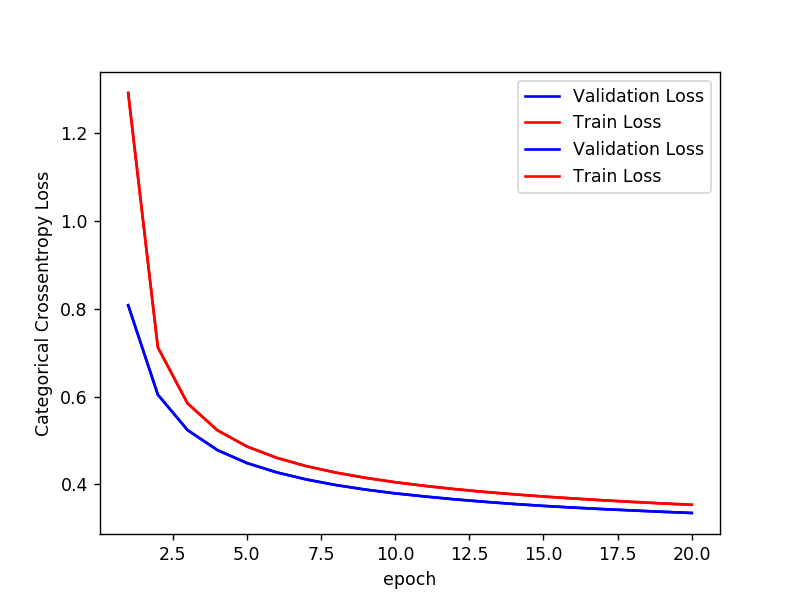

In [15]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

# MLP + ReLu activation + Adam Optimizer + 2-Layer( experiment)

In [16]:
from keras.models import Sequential 
from keras.layers import Dense, Activation
from keras.initializers import he_normal

# some model parameters
output_dim = 10
input_dim = X_train.shape[1]
batch_size = 128 
nb_epoch = 20


# start building a model
model_1 = Sequential()

# first hidden layer
model_1.add(Dense(364, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed=None)))
# second hidden layer
model_1.add(Dense(52, activation='relu', kernel_initializer=he_normal(seed=None)))

# output layer
model_1.add(Dense(output_dim, activation='softmax'))

model_1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 364)               285740    
_________________________________________________________________
dense_3 (Dense)              (None, 52)                18980     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                530       
Total params: 305,250
Trainable params: 305,250
Non-trainable params: 0
_________________________________________________________________


In [17]:
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history1 = model_1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 26s 431us/step - loss: 0.2756 - accuracy: 0.9209 - val_loss: 0.1319 - val_accuracy: 0.9601
Epoch 2/20
60000/60000 [==============================] - 21s 352us/step - loss: 0.1037 - accuracy: 0.9700 - val_loss: 0.0869 - val_accuracy: 0.9747
Epoch 3/20
60000/60000 [==============================] - 16s 269us/step - loss: 0.0686 - accuracy: 0.9795 - val_loss: 0.0716 - val_accuracy: 0.9787
Epoch 4/20
60000/60000 [==============================] - 15s 251us/step - loss: 0.0476 - accuracy: 0.9858 - val_loss: 0.0716 - val_accuracy: 0.9776
Epoch 5/20
60000/60000 [==============================] - 15s 257us/step - loss: 0.0357 - accuracy: 0.9889 - val_loss: 0.0649 - val_accuracy: 0.9797
Epoch 6/20
60000/60000 [==============================] - 15s 247us/step - loss: 0.0283 - accuracy: 0.9913 - val_loss: 0.0697 - val_accuracy: 0.9797
Epoch 7/20
60000/60000 [==============================] 

In [18]:
score = model_1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

#fig,ax = plt.subplots(1,1)
#ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
model_1_test_score = score[0]
model_1_test_acc = score[1]
model_1_train = history1.history['accuracy']

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

Test score: 0.096045138551638
Test accuracy: 0.9800999760627747


<IPython.core.display.Javascript object>


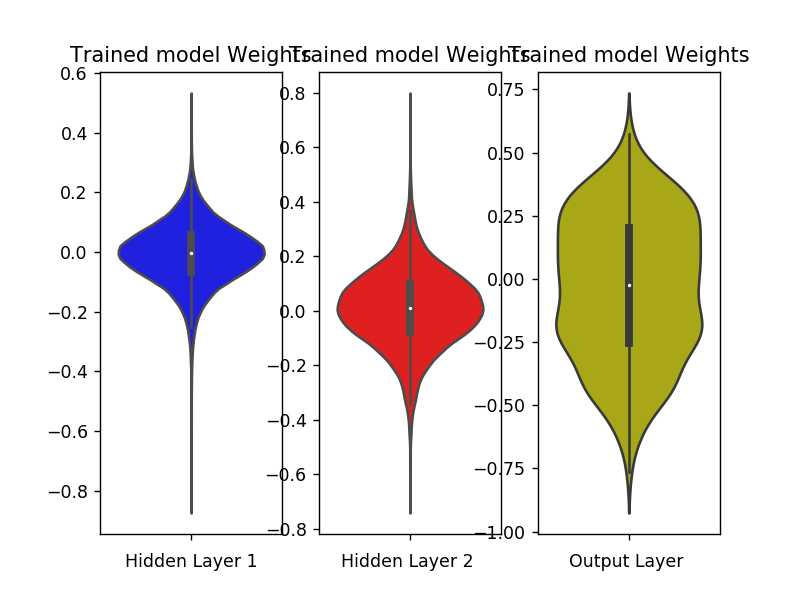

In [19]:
w_after = model_1.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

# MLP + Sigmoid activation + ADAM

In [20]:
model_sigmoid = Sequential()
model_sigmoid.add(Dense(512, activation='sigmoid', input_shape=(input_dim,)))
model_sigmoid.add(Dense(128, activation='sigmoid'))
model_sigmoid.add(Dense(output_dim, activation='softmax'))

model_sigmoid.summary()

model_sigmoid.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_sigmoid.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_6 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 21s 345us/step - loss: 0.5455 - accuracy: 0.8561 - val_loss: 0.2505 - val_accuracy: 0.9285
Epoch 2/20
60000/60000 [==============================] - 20s 327us/step - loss: 0.2222 - accuracy: 0.9345 - val_loss: 0.1821 - val_accuracy: 0.9473
Epoch 3/20
60000/60000 [======

Test score: 0.06853543838825717
Test accuracy: 0.9825000166893005


<IPython.core.display.Javascript object>


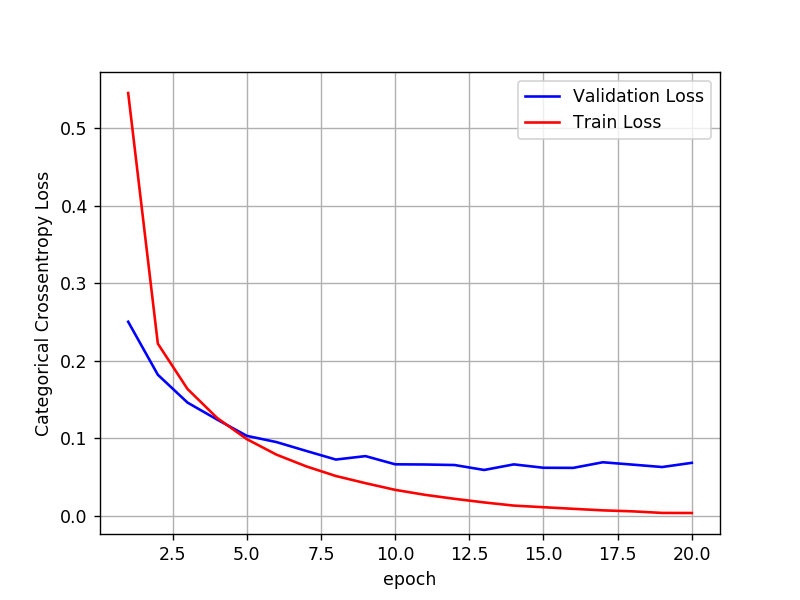

In [21]:
score = model_sigmoid.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


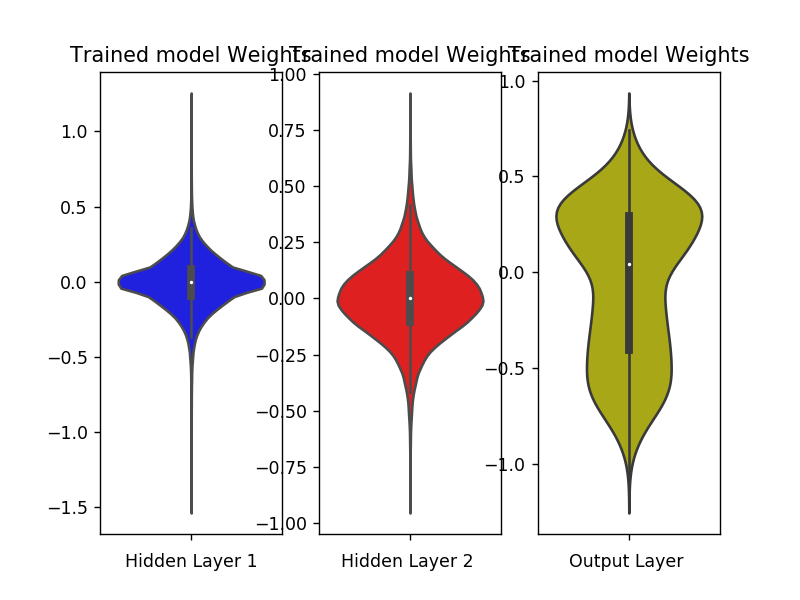

In [22]:
w_after = model_sigmoid.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## MLP + ReLU +SGD 


In [23]:
# Multilayer perceptron

# https://arxiv.org/pdf/1707.09725.pdf#page=95
# for relu layers
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni). 
# h1 =>  σ=√(2/(fan_in) = 0.062  => N(0,σ) = N(0,0.062)
# h2 =>  σ=√(2/(fan_in) = 0.125  => N(0,σ) = N(0,0.125)
# out =>  σ=√(2/(fan_in+1) = 0.120  => N(0,σ) = N(0,0.120)

model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_9 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_10 (Dense)             (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [24]:
model_relu.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 15s 243us/step - loss: 0.7408 - accuracy: 0.7910 - val_loss: 0.3847 - val_accuracy: 0.8978
Epoch 2/20
60000/60000 [==============================] - 14s 228us/step - loss: 0.3568 - accuracy: 0.8990 - val_loss: 0.3001 - val_accuracy: 0.9165
Epoch 3/20
60000/60000 [==============================] - 14s 239us/step - loss: 0.2936 - accuracy: 0.9163 - val_loss: 0.2635 - val_accuracy: 0.9263
Epoch 4/20
60000/60000 [==============================] - 14s 227us/step - loss: 0.2579 - accuracy: 0.9269 - val_loss: 0.2385 - val_accuracy: 0.9330
Epoch 5/20
60000/60000 [==============================] - 14s 241us/step - loss: 0.2333 - accuracy: 0.9340 - val_loss: 0.2203 - val_accuracy: 0.9382
Epoch 6/20
60000/60000 [==============================] - 14s 241us/step - loss: 0.2143 - accuracy: 0.9393 - val_loss: 0.2050 - val_accuracy: 0.9416
Epoch 7/20
60000/60000 [==============================] 

Test score: 0.12351691169328988
Test accuracy: 0.9631999731063843


<IPython.core.display.Javascript object>


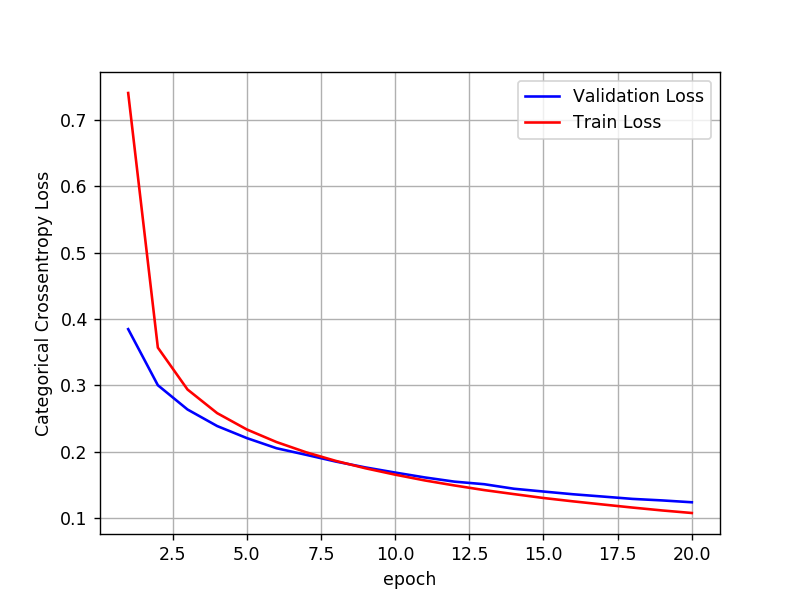

In [25]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


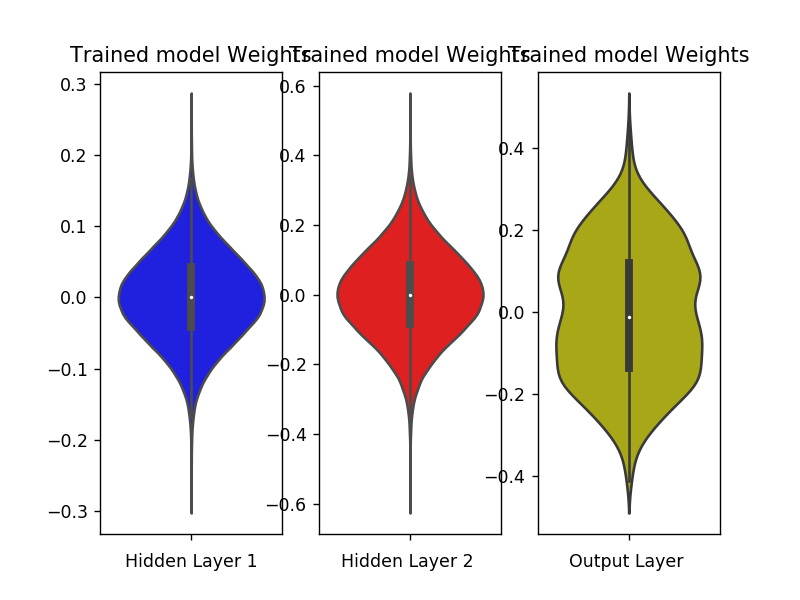

In [26]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## MLP + ReLU + ADAM

In [27]:
model_relu = Sequential()
model_relu.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

print(model_relu.summary())

model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_12 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_13 (Dense)             (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________
None
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 20s 329us/step - loss: 0.2307 - accuracy: 0.9318 - val_loss: 0.1117 - val_accuracy: 0.9657
Epoch 2/20
60000/60000 [==============================] - 18s 305us/step - loss: 0.0838 - accuracy: 0.9743 - val_loss: 0.0892 - val_accuracy: 0.9723
Epoch 3/20
60000/60000 [=

Test score: 0.08674870625808599
Test accuracy: 0.9815000295639038


<IPython.core.display.Javascript object>


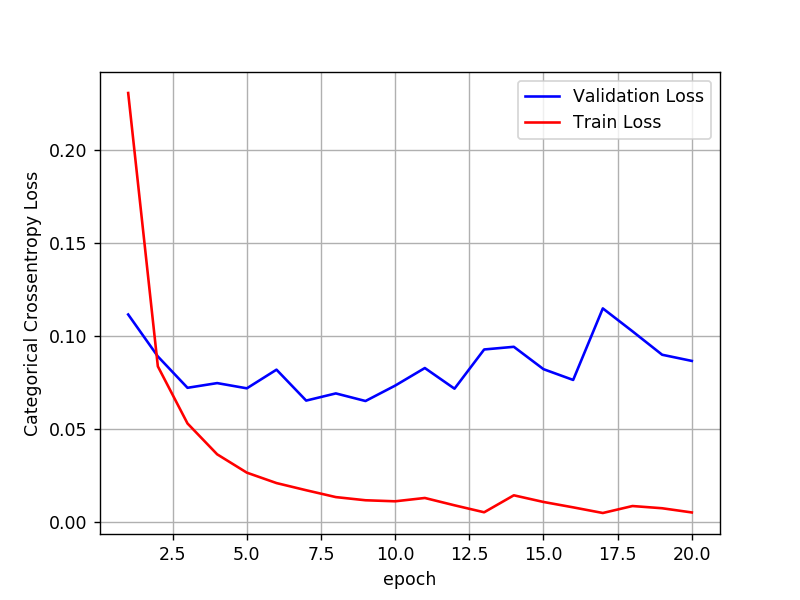

In [28]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


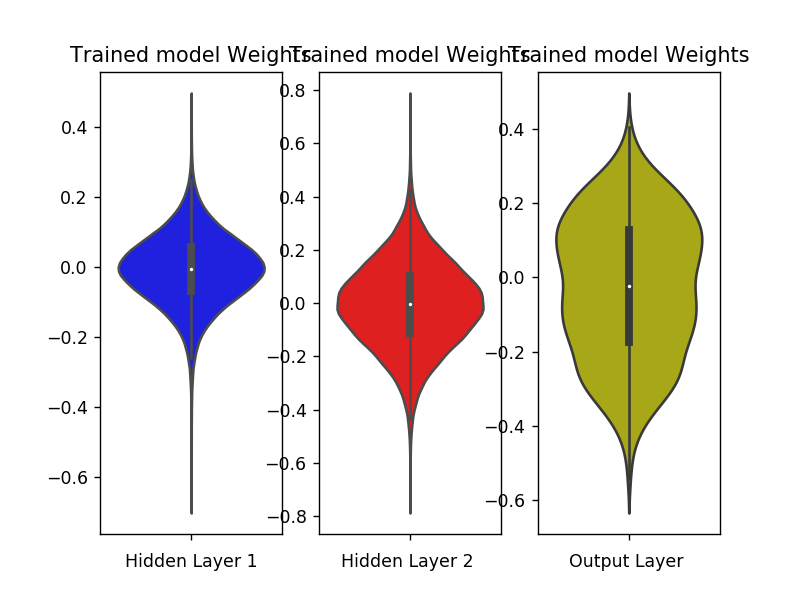

In [29]:
w_after = model_relu.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## MLP + Batch-Norm on hidden Layers + AdamOptimizer

In [30]:
# Multilayer perceptron

# https://intoli.com/blog/neural-network-initialization/ 
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni+ni+1). 
# h1 =>  σ=√(2/(ni+ni+1) = 0.039  => N(0,σ) = N(0,0.039)
# h2 =>  σ=√(2/(ni+ni+1) = 0.055  => N(0,σ) = N(0,0.055)
# h1 =>  σ=√(2/(ni+ni+1) = 0.120  => N(0,σ) = N(0,0.120)

from keras.layers.normalization import BatchNormalization

model_batch = Sequential()

model_batch.add(Dense(512, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_batch.add(BatchNormalization())

model_batch.add(Dense(128, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_batch.add(BatchNormalization())

model_batch.add(Dense(output_dim, activation='softmax'))


model_batch.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dense_15 (Dense)             (None, 128)               65664     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
_________________________________________________________________
dense_16 (Dense)             (None, 10)                1290      
Total params: 471,434
Trainable params: 470,154
Non-trainable params: 1,280
_________________________________________________________________


In [31]:
model_batch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_batch.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 31s 519us/step - loss: 0.2999 - accuracy: 0.9111 - val_loss: 0.2035 - val_accuracy: 0.9412
Epoch 2/20
60000/60000 [==============================] - 22s 370us/step - loss: 0.1729 - accuracy: 0.9496 - val_loss: 0.1672 - val_accuracy: 0.9512
Epoch 3/20
60000/60000 [==============================] - 23s 381us/step - loss: 0.1369 - accuracy: 0.9591 - val_loss: 0.1439 - val_accuracy: 0.9567
Epoch 4/20
60000/60000 [==============================] - 23s 379us/step - loss: 0.1124 - accuracy: 0.9660 - val_loss: 0.1475 - val_accuracy: 0.9559
Epoch 5/20
60000/60000 [==============================] - 22s 372us/step - loss: 0.0954 - accuracy: 0.9707 - val_loss: 0.1374 - val_accuracy: 0.9566
Epoch 6/20
60000/60000 [==============================] - 21s 354us/step - loss: 0.0807 - accuracy: 0.9749 - val_loss: 0.1135 - val_accuracy: 0.9646
Epoch 7/20
60000/60000 [==============================] 

Test score: 0.09408825902347454
Test accuracy: 0.9742000102996826


<IPython.core.display.Javascript object>


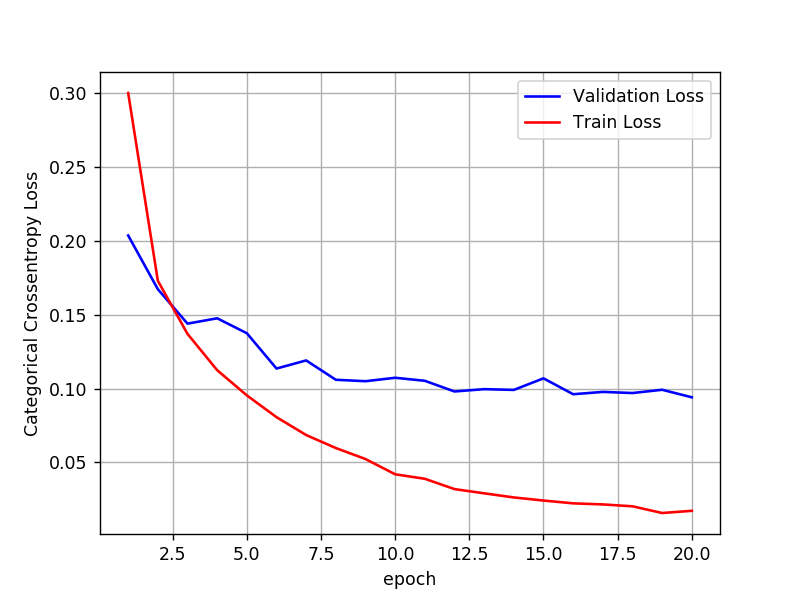

In [32]:
score = model_batch.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


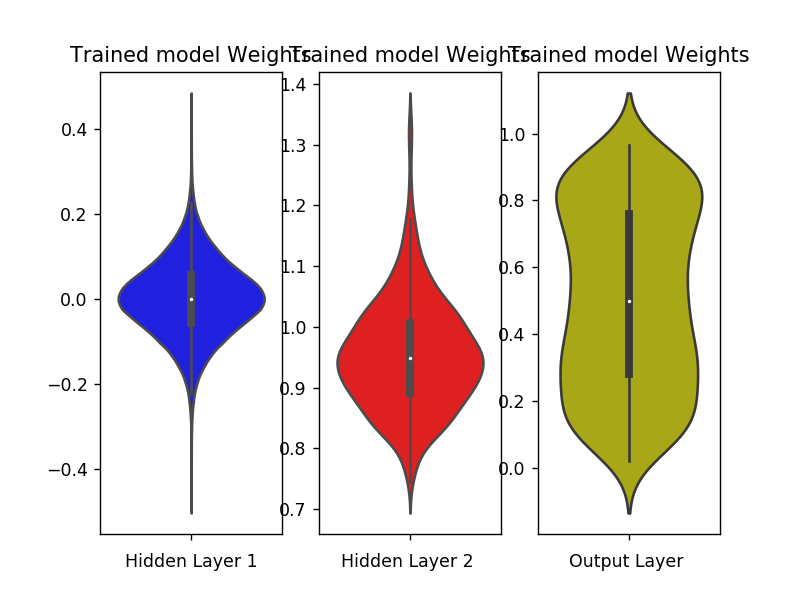

In [33]:
w_after = model_batch.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## 5. MLP + Dropout + AdamOptimizer

In [34]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model_drop = Sequential()

model_drop.add(Dense(512, activation='sigmoid', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(128, activation='sigmoid', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))


model_drop.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_3 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 128)               65664     
_________________________________________________________________
batch_normalization_4 (Batch (None, 128)               512       
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 10)               

In [35]:
model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 27s 448us/step - loss: 0.6754 - accuracy: 0.7914 - val_loss: 0.2864 - val_accuracy: 0.9169
Epoch 2/20
60000/60000 [==============================] - 24s 407us/step - loss: 0.4325 - accuracy: 0.8675 - val_loss: 0.2540 - val_accuracy: 0.9259
Epoch 3/20
60000/60000 [==============================] - 24s 399us/step - loss: 0.3827 - accuracy: 0.8835 - val_loss: 0.2372 - val_accuracy: 0.9300
Epoch 4/20
60000/60000 [==============================] - 28s 466us/step - loss: 0.3524 - accuracy: 0.8935 - val_loss: 0.2228 - val_accuracy: 0.9339
Epoch 5/20
60000/60000 [==============================] - 28s 468us/step - loss: 0.3342 - accuracy: 0.8978 - val_loss: 0.2121 - val_accuracy: 0.9381
Epoch 6/20
60000/60000 [==============================] - 24s 403us/step - loss: 0.3222 - accuracy: 0.9033 - val_loss: 0.2007 - val_accuracy: 0.9391
Epoch 7/20
60000/60000 [==============================] 

Test score: 0.11052532543241977
Test accuracy: 0.9682000279426575


<IPython.core.display.Javascript object>


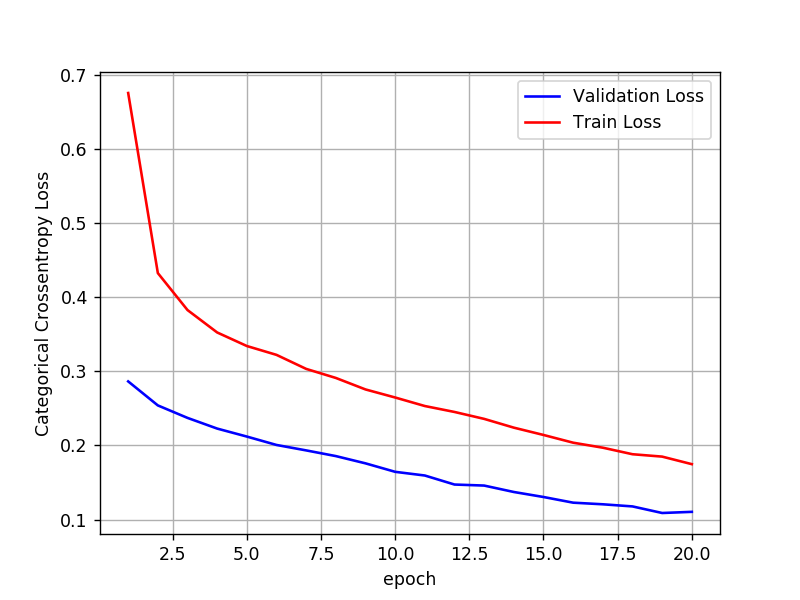

In [36]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


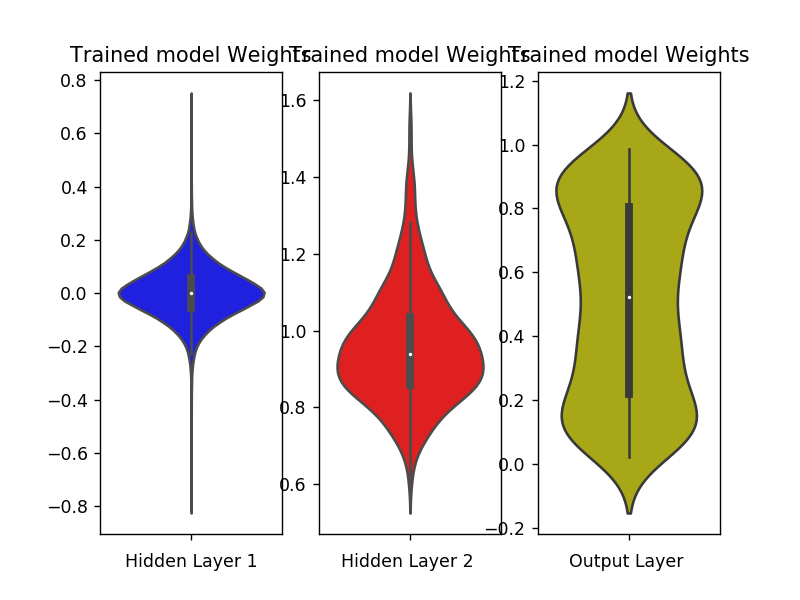

In [37]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## Hyper-parameter tuning of Keras models using Sklearn

In [38]:
from keras.optimizers import Adam,RMSprop,SGD
def best_hyperparameters(activ):

    model = Sequential()
    model.add(Dense(512, activation=activ, input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
    model.add(Dense(128, activation=activ, kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
    model.add(Dense(output_dim, activation='softmax'))


    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
    
    return model

In [39]:
 #https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/

activ = ['sigmoid','relu']

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

model = KerasClassifier(build_fn=best_hyperparameters, epochs=nb_epoch, batch_size=batch_size, verbose=0)
param_grid = dict(activ=activ)

# if you are using CPU
# grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
# if you are using GPU dont use the n_jobs parameter

grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(X_train, Y_train)

C:\Users\Santosh\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [40]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.977733 using {'activ': 'relu'}
0.975183 (0.001243) with: {'activ': 'sigmoid'}
0.977733 (0.001759) with: {'activ': 'relu'}


# Assignment


###  Using Activation= relu,   Optimizer= Adam
#### 2 Hidden Layers, 3 Hidden Layers, 5 Hidden Layers.

In [47]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization

from keras.models import Sequential 
from keras.layers import Dense, Activation
from keras.initializers import he_normal


#paramter
output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128 
nb_epoch = 20


## MLP + ReLu + Adam + BN+Dropout(0.5)+ 2-Layer

In [48]:
# Initialising model
model_1 = Sequential()

# First hidden Layer
model_1.add(Dense(364, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed=None)))

model_1.add(BatchNormalization())

model_1.add(Dropout(0.5))

# second hidden layer
model_1.add(Dense(52, activation='relu', kernel_initializer=he_normal(seed=None)))

model_1.add(BatchNormalization())

model_1.add(Dropout(0.5))

# output layer
model_1.add(Dense(output_dim, activation='softmax'))


model_1.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 364)               285740    
_________________________________________________________________
batch_normalization_7 (Batch (None, 364)               1456      
_________________________________________________________________
dropout_5 (Dropout)          (None, 364)               0         
_________________________________________________________________
dense_45 (Dense)             (None, 52)                18980     
_________________________________________________________________
batch_normalization_8 (Batch (None, 52)                208       
_________________________________________________________________
dropout_6 (Dropout)          (None, 52)                0         
_________________________________________________________________
dense_46 (Dense)             (None, 10)              

In [49]:
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_m1 = model_1.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 43s 722us/step - loss: 0.5421 - accuracy: 0.8371 - val_loss: 0.1780 - val_accuracy: 0.9477
Epoch 2/20
60000/60000 [==============================] - 36s 595us/step - loss: 0.2645 - accuracy: 0.9241 - val_loss: 0.1233 - val_accuracy: 0.9611
Epoch 3/20
60000/60000 [==============================] - 33s 550us/step - loss: 0.2045 - accuracy: 0.9413 - val_loss: 0.1054 - val_accuracy: 0.9679
Epoch 4/20
60000/60000 [==============================] - 32s 536us/step - loss: 0.1701 - accuracy: 0.9503 - val_loss: 0.0896 - val_accuracy: 0.9714
Epoch 5/20
60000/60000 [==============================] - 34s 570us/step - loss: 0.1528 - accuracy: 0.9555 - val_loss: 0.0859 - val_accuracy: 0.9718
Epoch 6/20
60000/60000 [==============================] - 35s 584us/step - loss: 0.1418 - accuracy: 0.9587 - val_loss: 0.0856 - val_accuracy: 0.9741
Epoch 7/20
60000/60000 [==============================] 

Test score: 0.06056223605640116
Test accuracy: 0.9824000000953674


<IPython.core.display.Javascript object>


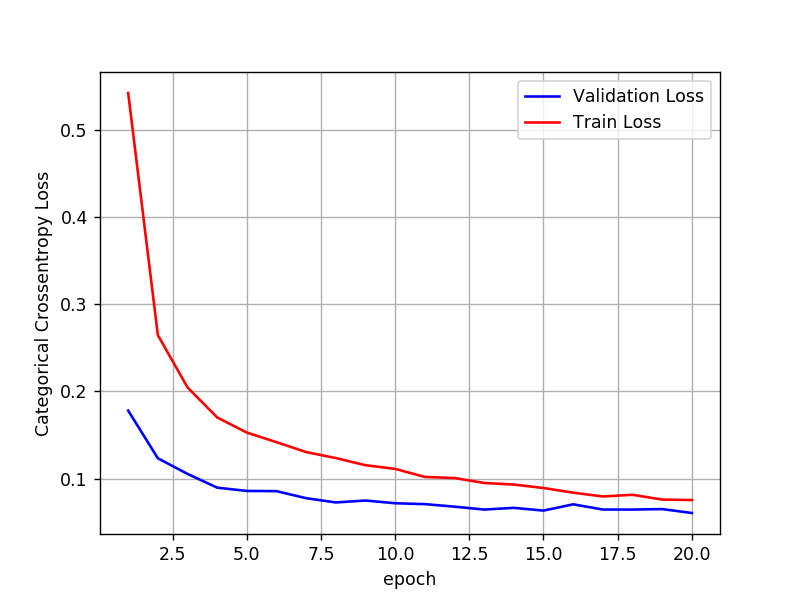

In [55]:
score = model_1.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history_m1.history['val_loss']
ty = history_m1.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


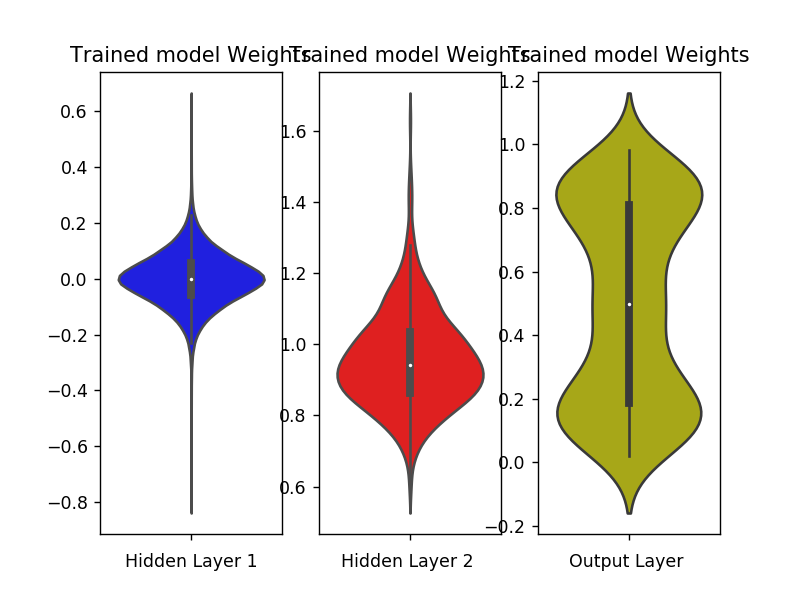

In [56]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

# MLP + Batch-Norm and Dropout(0.2) on 2 hidden Layer

In [41]:
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout

model_12 = Sequential()

model_12.add(Dense(576, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.056, seed=None)))
model_12.add(BatchNormalization())
model_12.add(Dropout(0.2))

model_12.add(Dense(340, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.068, seed=None)) )
model_12.add(BatchNormalization())
model_12.add(Dropout(0.2))

model_12.add(Dense(output_dim, activation='softmax'))


model_12.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 576)               452160    
_________________________________________________________________
batch_normalization_5 (Batch (None, 576)               2304      
_________________________________________________________________
dropout_3 (Dropout)          (None, 576)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 340)               196180    
_________________________________________________________________
batch_normalization_6 (Batch (None, 340)               1360      
_________________________________________________________________
dropout_4 (Dropout)          (None, 340)               0         
_________________________________________________________________
dense_43 (Dense)             (None, 10)              

In [43]:
model_12.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_12 = model_12.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 45s 753us/step - loss: 0.2261 - accuracy: 0.9310 - val_loss: 0.1076 - val_accuracy: 0.9656
Epoch 2/20
60000/60000 [==============================] - 39s 642us/step - loss: 0.0996 - accuracy: 0.9693 - val_loss: 0.0837 - val_accuracy: 0.9725
Epoch 3/20
60000/60000 [==============================] - 34s 574us/step - loss: 0.0718 - accuracy: 0.9772 - val_loss: 0.0728 - val_accuracy: 0.9781
Epoch 4/20
60000/60000 [==============================] - 33s 553us/step - loss: 0.0575 - accuracy: 0.9816 - val_loss: 0.0691 - val_accuracy: 0.9779
Epoch 5/20
60000/60000 [==============================] - 33s 551us/step - loss: 0.0492 - accuracy: 0.9836 - val_loss: 0.0621 - val_accuracy: 0.9794
Epoch 6/20
60000/60000 [==============================] - 33s 553us/step - loss: 0.0441 - accuracy: 0.9850 - val_loss: 0.0611 - val_accuracy: 0.9801
Epoch 7/20
60000/60000 [==============================] 

Test score: 0.06859428682197286
Test accuracy: 0.983299970626831


<IPython.core.display.Javascript object>


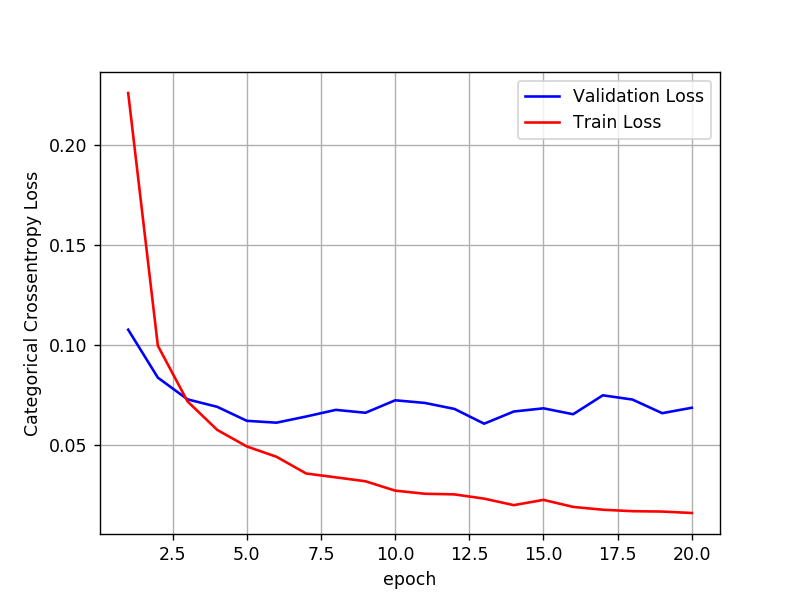

In [44]:
score = model_12.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history_12.history['val_loss']
ty = history_12.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


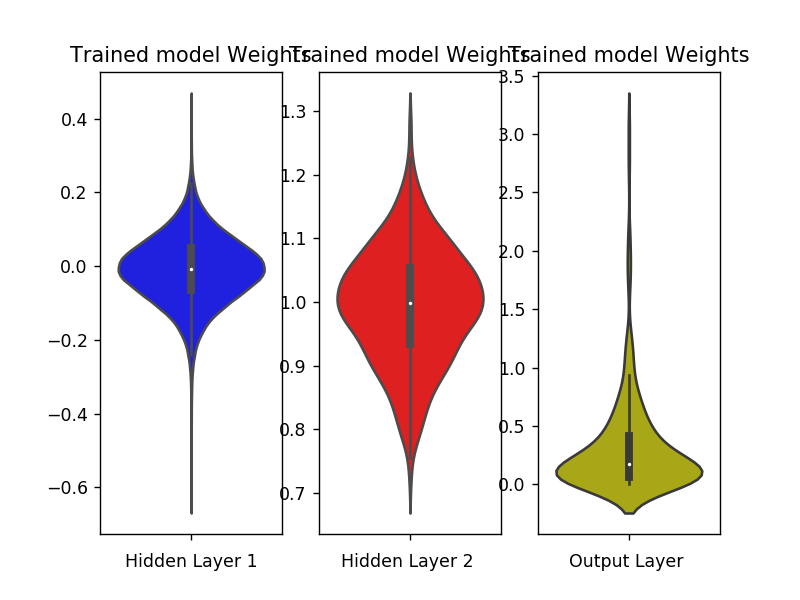

In [45]:
w_after = model_12.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## MLP + ReLu + Adam+ BN+Dropout(0.5)+ 3-Layer

In [46]:
# Initialising model
model_2 = Sequential()

# first hidden layer
model_2.add(Dense(550, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed=None)))
model_2.add(BatchNormalization())
model_2.add(Dropout(0.5))

# second hidden layer
model_2.add(Dense(235, activation='relu', kernel_initializer=he_normal(seed=None)))
model_2.add(BatchNormalization())
model_2.add(Dropout(0.5))

#third hidden layer
model_2.add(Dense(75, activation='relu', kernel_initializer=he_normal(seed=None)))
model_2.add(BatchNormalization())
model_2.add(Dropout(0.5))

model_2.add(Dense(output_dim, activation='softmax'))


model_2.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 550)               431750    
_________________________________________________________________
batch_normalization_7 (Batch (None, 550)               2200      
_________________________________________________________________
dropout_5 (Dropout)          (None, 550)               0         
_________________________________________________________________
dense_45 (Dense)             (None, 235)               129485    
_________________________________________________________________
batch_normalization_8 (Batch (None, 235)               940       
_________________________________________________________________
dropout_6 (Dropout)          (None, 235)               0         
_________________________________________________________________
dense_46 (Dense)             (None, 75)              

In [47]:
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_m2= model_2.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 42s 702us/step - loss: 0.5963 - accuracy: 0.8192 - val_loss: 0.1711 - val_accuracy: 0.9468
Epoch 2/20
60000/60000 [==============================] - 39s 645us/step - loss: 0.2564 - accuracy: 0.9264 - val_loss: 0.1255 - val_accuracy: 0.9623
Epoch 3/20
60000/60000 [==============================] - 39s 647us/step - loss: 0.2035 - accuracy: 0.9427 - val_loss: 0.1057 - val_accuracy: 0.9686
Epoch 4/20
60000/60000 [==============================] - 39s 656us/step - loss: 0.1651 - accuracy: 0.9528 - val_loss: 0.0916 - val_accuracy: 0.9716
Epoch 5/20
60000/60000 [==============================] - 41s 678us/step - loss: 0.1441 - accuracy: 0.9576 - val_loss: 0.0872 - val_accuracy: 0.9756
Epoch 6/20
60000/60000 [==============================] - 40s 659us/step - loss: 0.1346 - accuracy: 0.9614 - val_loss: 0.0775 - val_accuracy: 0.9764
Epoch 7/20
60000/60000 [==============================] 

Test score: 0.056653810659673766
Test accuracy: 0.9847000241279602


<IPython.core.display.Javascript object>


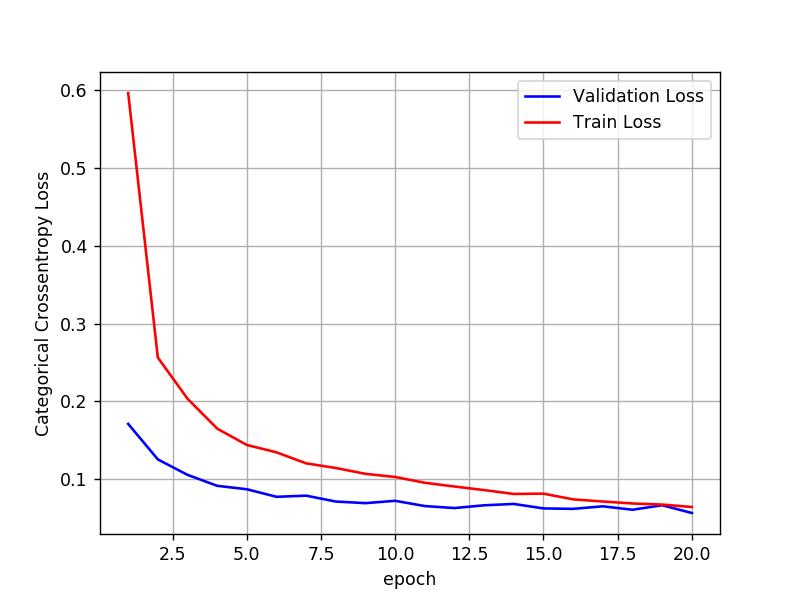

In [48]:
score = model_2.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history_m2.history['val_loss']
ty = history_m2.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


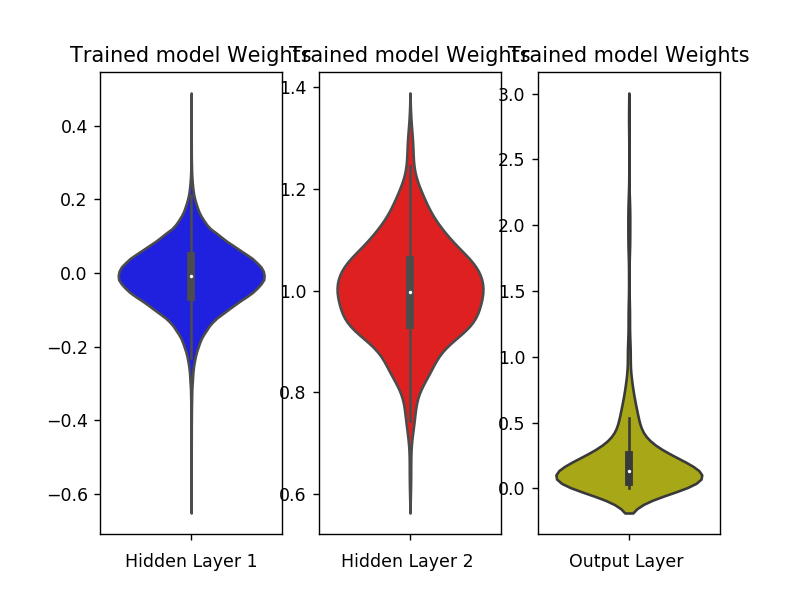

In [49]:
w_after = model_2.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

# MLP + BN + Dropout(0.2) on 3 hidden Layers

In [51]:
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout

model_32 = Sequential()

model_32.add(Dense(502, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_32.add(BatchNormalization())
model_32.add(Dropout(0.2))

model_32.add(Dense(304, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.074, seed=None)))
model_32.add(BatchNormalization())
model_32.add(Dropout(0.2))

model_32.add(Dense(76, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.185, seed=None)) )
model_32.add(BatchNormalization())
model_32.add(Dropout(0.2))

model_32.add(Dense(output_dim, activation='softmax'))


model_32.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 502)               394070    
_________________________________________________________________
batch_normalization_10 (Batc (None, 502)               2008      
_________________________________________________________________
dropout_8 (Dropout)          (None, 502)               0         
_________________________________________________________________
dense_49 (Dense)             (None, 304)               152912    
_________________________________________________________________
batch_normalization_11 (Batc (None, 304)               1216      
_________________________________________________________________
dropout_9 (Dropout)          (None, 304)               0         
_________________________________________________________________
dense_50 (Dense)             (None, 76)              

In [52]:
model_32.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_32 = model_32.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 43s 712us/step - loss: 0.3052 - accuracy: 0.9086 - val_loss: 0.1177 - val_accuracy: 0.9642
Epoch 2/20
60000/60000 [==============================] - 36s 606us/step - loss: 0.1305 - accuracy: 0.9612 - val_loss: 0.0879 - val_accuracy: 0.9724
Epoch 3/20
60000/60000 [==============================] - 37s 612us/step - loss: 0.0944 - accuracy: 0.9702 - val_loss: 0.0840 - val_accuracy: 0.9730
Epoch 4/20
60000/60000 [==============================] - 39s 657us/step - loss: 0.0776 - accuracy: 0.9760 - val_loss: 0.0707 - val_accuracy: 0.9768
Epoch 5/20
60000/60000 [==============================] - 41s 684us/step - loss: 0.0656 - accuracy: 0.9793 - val_loss: 0.0700 - val_accuracy: 0.9777
Epoch 6/20
60000/60000 [==============================] - 39s 647us/step - loss: 0.0567 - accuracy: 0.9815 - val_loss: 0.0685 - val_accuracy: 0.9791
Epoch 7/20
60000/60000 [==============================] 

Test score: 0.06272427673040802
Test accuracy: 0.9825999736785889


<IPython.core.display.Javascript object>


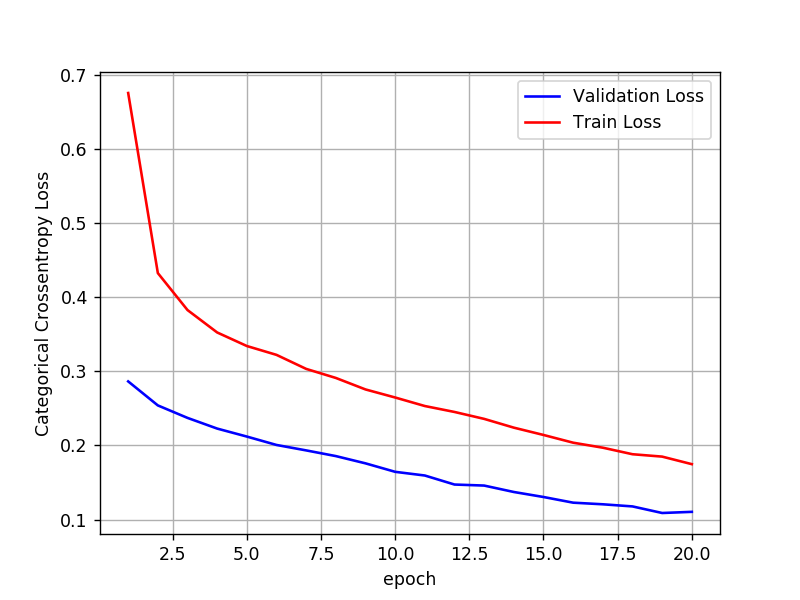

In [53]:
score = model_32.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


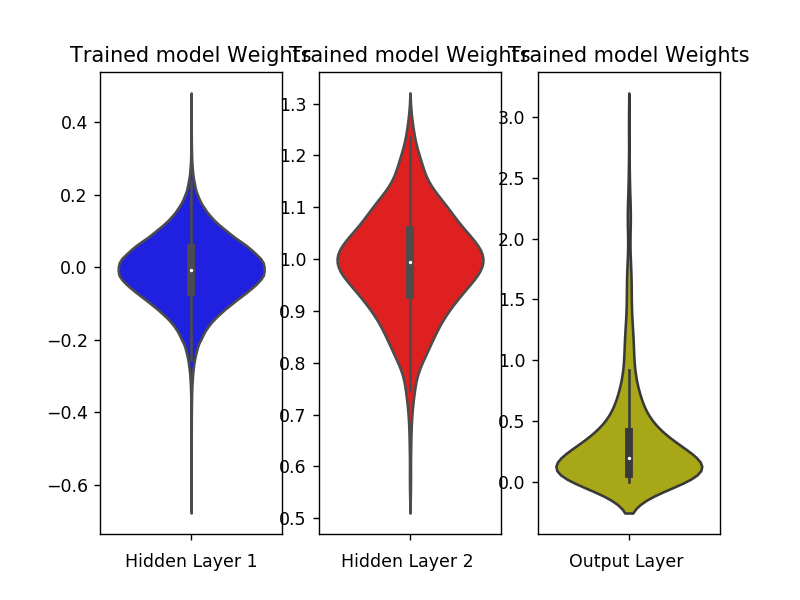

In [54]:
w_after = model_32.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## MLP + ReLu + Adam+ BN+Dropout(0.5) + 5-Layer(512,364,256,128,64)

In [55]:
# Initialising model
model_3 = Sequential()

# first hidden layer
model_3.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed=None)))
model_3.add(BatchNormalization())
model_3.add(Dropout(0.5))

# second hidden layer
model_3.add(Dense(364, activation='relu', kernel_initializer=he_normal(seed=None)))
model_3.add(BatchNormalization())
model_3.add(Dropout(0.5))

# third hidden layer
model_3.add(Dense(256, activation='relu', kernel_initializer=he_normal(seed=None)))
model_3.add(BatchNormalization())
model_3.add(Dropout(0.5))

# fourth hidden layer
model_3.add(Dense(128, activation='relu', kernel_initializer=he_normal(seed=None)))
model_3.add(BatchNormalization())
model_3.add(Dropout(0.5))

# fifth hidden layer
model_3.add(Dense(64, activation='relu', kernel_initializer=he_normal(seed=None)))
model_3.add(BatchNormalization())
model_3.add(Dropout(0.5))

# Adding output layer
model_3.add(Dense(output_dim, activation='softmax'))


model_3.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_52 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_13 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_11 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_53 (Dense)             (None, 364)               186732    
_________________________________________________________________
batch_normalization_14 (Batc (None, 364)               1456      
_________________________________________________________________
dropout_12 (Dropout)         (None, 364)               0         
_________________________________________________________________
dense_54 (Dense)             (None, 256)             

In [56]:
model_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_m3= model_3.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 49s 811us/step - loss: 1.1462 - accuracy: 0.6388 - val_loss: 0.2659 - val_accuracy: 0.9249
Epoch 2/20
60000/60000 [==============================] - 58s 968us/step - loss: 0.4038 - accuracy: 0.8872 - val_loss: 0.1757 - val_accuracy: 0.9524
Epoch 3/20
60000/60000 [==============================] - 44s 730us/step - loss: 0.2936 - accuracy: 0.9221 - val_loss: 0.1411 - val_accuracy: 0.9619
Epoch 4/20
60000/60000 [==============================] - 42s 706us/step - loss: 0.2393 - accuracy: 0.9372 - val_loss: 0.1185 - val_accuracy: 0.9683
Epoch 5/20
60000/60000 [==============================] - 44s 728us/step - loss: 0.2122 - accuracy: 0.9443 - val_loss: 0.1057 - val_accuracy: 0.9724
Epoch 6/20
60000/60000 [==============================] - 42s 702us/step - loss: 0.1926 - accuracy: 0.9498 - val_loss: 0.1005 - val_accuracy: 0.9722
Epoch 7/20
60000/60000 [==============================] 

Test score: 0.07529761268235743
Test accuracy: 0.9822999835014343


<IPython.core.display.Javascript object>


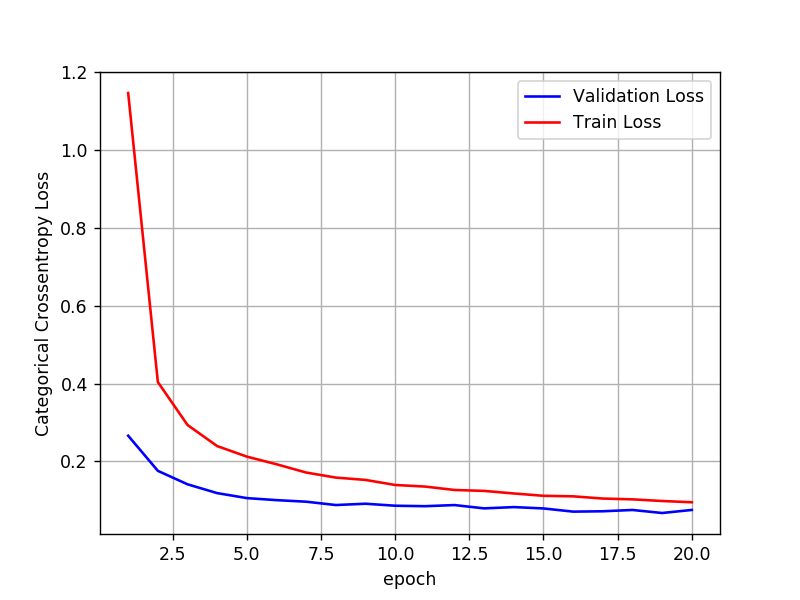

In [57]:
score = model_3.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history_m3.history['val_loss']
ty = history_m3.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


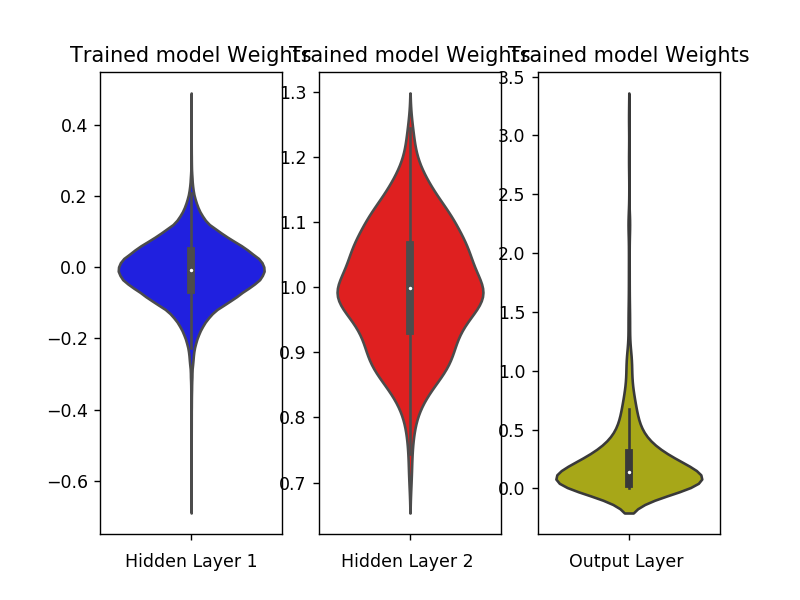

In [58]:
w_after = model_3.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

# MLP + ReLu + Adam+ BN+Dropout(0.2) + 5-Layer(612,464,311,158,78)


In [59]:
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout

model_52 = Sequential()

model_52.add(Dense(612, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.054, seed=None)))
model_52.add(BatchNormalization())
model_52.add(Dropout(0.2))

model_52.add(Dense(464, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.066, seed=None)))
model_52.add(BatchNormalization())
model_52.add(Dropout(0.2))

model_52.add(Dense(311, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.080, seed=None)))
model_52.add(BatchNormalization())
model_52.add(Dropout(0.2))

model_52.add(Dense(158, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.088, seed=None)))
model_52.add(BatchNormalization())
model_52.add(Dropout(0.2))

model_52.add(Dense(78, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_52.add(BatchNormalization())
model_52.add(Dropout(0.2))


model_52.add(Dense(output_dim, activation='softmax'))


model_52.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_58 (Dense)             (None, 612)               480420    
_________________________________________________________________
batch_normalization_18 (Batc (None, 612)               2448      
_________________________________________________________________
dropout_16 (Dropout)         (None, 612)               0         
_________________________________________________________________
dense_59 (Dense)             (None, 464)               284432    
_________________________________________________________________
batch_normalization_19 (Batc (None, 464)               1856      
_________________________________________________________________
dropout_17 (Dropout)         (None, 464)               0         
_________________________________________________________________
dense_60 (Dense)             (None, 311)             

In [60]:
model_52.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_52 = model_52.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 24s 400us/step - loss: 0.3608 - accuracy: 0.8925 - val_loss: 0.1296 - val_accuracy: 0.9608
Epoch 2/20
60000/60000 [==============================] - 22s 363us/step - loss: 0.1464 - accuracy: 0.9560 - val_loss: 0.1057 - val_accuracy: 0.9705
Epoch 3/20
60000/60000 [==============================] - 21s 357us/step - loss: 0.1109 - accuracy: 0.9668 - val_loss: 0.0842 - val_accuracy: 0.9754
Epoch 4/20
60000/60000 [==============================] - 22s 369us/step - loss: 0.0893 - accuracy: 0.9728 - val_loss: 0.0757 - val_accuracy: 0.9773
Epoch 5/20
60000/60000 [==============================] - 22s 375us/step - loss: 0.0769 - accuracy: 0.9759 - val_loss: 0.0806 - val_accuracy: 0.9751
Epoch 6/20
60000/60000 [==============================] - 22s 369us/step - loss: 0.0684 - accuracy: 0.9794 - val_loss: 0.0657 - val_accuracy: 0.9804
Epoch 7/20
60000/60000 [==============================] 

Test score: 0.07005564393560634
Test accuracy: 0.9830999970436096


C:\Users\Santosh\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


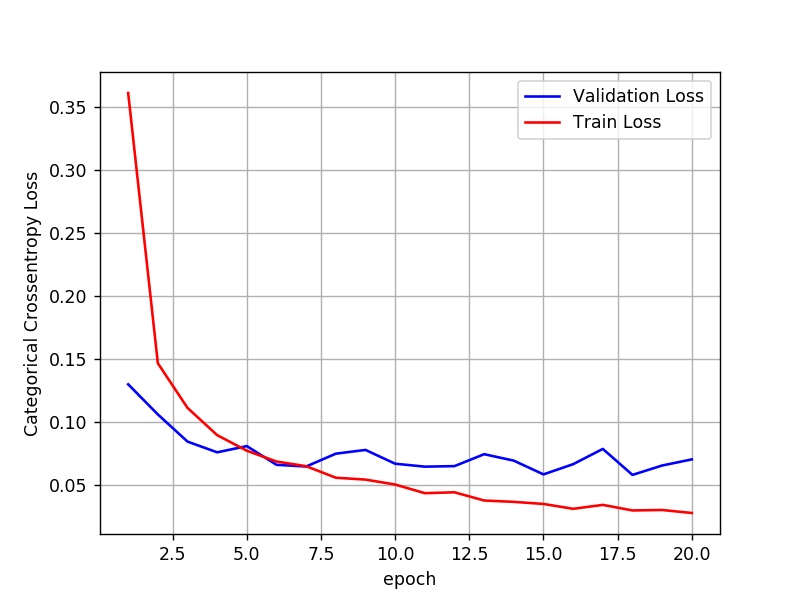

In [61]:
score = model_52.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history_52.history['val_loss']
ty = history_52.history['loss']
plt_dynamic(x, vy, ty, ax)

<IPython.core.display.Javascript object>


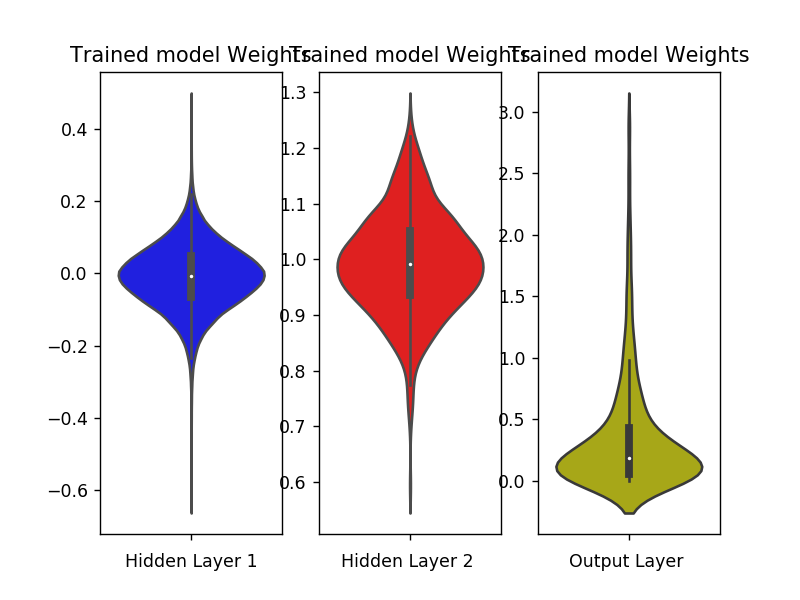

In [62]:
w_after = model_52.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

# Conclusion

In [63]:
from prettytable import PrettyTable

x = PrettyTable()

x.field_names = ["Model","Test loss", "Test accuracy"]
x.add_row(["MLP + ReLu activation + Adam Optimizer + BN+Dropout(0.5)+ 2-Hidden Layer", 0.06056223605640116,0.9824000000953674])

x.add_row(["MLP + ReLu activation + Adam Optimizer + BN+Dropout(0.2)+ 2-Hidden Layer", 0.06859428682197286,0.983299970626831])

x.add_row(["MLP + ReLu activation + Adam Optimizer + BN+Dropout(0.5)+ 3-Hidden Layer", 0.06358614531699568,0.9828000068664551])

x.add_row(["MLP + ReLu activation + Adam Optimizer + BN+Dropout(0.2)+ 3-Hidden Layer",  0.06272427673040802,0.9825999736785889])

x.add_row(["MLP + ReLu activation + Adam Optimizer + BN+Dropout(0.5)+ 5-Hidden Layer", 0.07726619798289612,0.9807999730110168])

x.add_row(["MLP + ReLu activation + Adam Optimizer + BN+Dropout(0.2)+ 5-Hidden Layer", 0.07005564393560634,0.9830999970436096])

print(x)

+--------------------------------------------------------------------------+---------------------+--------------------+
|                                  Model                                   |      Test loss      |   Test accuracy    |
+--------------------------------------------------------------------------+---------------------+--------------------+
| MLP + ReLu activation + Adam Optimizer + BN+Dropout(0.5)+ 2-Hidden Layer | 0.06056223605640116 | 0.9824000000953674 |
| MLP + ReLu activation + Adam Optimizer + BN+Dropout(0.2)+ 2-Hidden Layer | 0.06859428682197286 | 0.983299970626831  |
| MLP + ReLu activation + Adam Optimizer + BN+Dropout(0.5)+ 3-Hidden Layer | 0.06358614531699568 | 0.9828000068664551 |
| MLP + ReLu activation + Adam Optimizer + BN+Dropout(0.2)+ 3-Hidden Layer | 0.06272427673040802 | 0.9825999736785889 |
| MLP + ReLu activation + Adam Optimizer + BN+Dropout(0.5)+ 5-Hidden Layer | 0.07726619798289612 | 0.9807999730110168 |
| MLP + ReLu activation + Adam Optimizer

In [ ]:
import dill
load